### 1) В среде Google Colab создали новый блокнот (notebook). Импортировали необходимые для работы библиотеки и модули. Настроили блокнот для работы с аппаратным ускорителем GPU.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# импорт модулей
import os
os.mkdir('/content/drive/MyDrive/Colab Notebooks/is_lab4')
os.chdir('/content/drive/MyDrive/Colab Notebooks/is_lab4')

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np


In [5]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


### 2) Загрузили набор данных IMDb, содержащий оцифрованные отзывы на фильмы, размеченные на два класса: позитивные и негативные. При загрузке набора данных параметр seed выбрали равным значению (4k – 1)=15, где k=4 – номер бригады. Вывели размеры полученных обучающих и тестовых массивов данных.

In [6]:
# загрузка датасета
from keras.datasets import imdb

vocabulary_size = 5000
index_from = 3

(X_train, y_train), (X_test, y_test) = imdb.load_data(
    path="imdb.npz",
    num_words=vocabulary_size,
    skip_top=0,
    maxlen=None,
    seed=15,
    start_char=1,
    oov_char=2,
    index_from=index_from
    )

# вывод размерностей
print('Shape of X train:', X_train.shape)
print('Shape of y train:', y_train.shape)
print('Shape of X test:', X_test.shape)
print('Shape of y test:', y_test.shape)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Shape of X train: (25000,)
Shape of y train: (25000,)
Shape of X test: (25000,)
Shape of y test: (25000,)


### 3) Вывели один отзыв из обучающего множества в виде списка индексов слов. Преобразовали список индексов в текст и вывели отзыв в виде текста. Вывели длину отзыва. Вывели метку класса данного отзыва и название класса (1 – Positive, 0 – Negative).

In [7]:
# создание словаря для перевода индексов в слова
# заргузка словаря "слово:индекс"
word_to_id = imdb.get_word_index()
# уточнение словаря
word_to_id = {key:(value + index_from) for key,value in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2
word_to_id["<UNUSED>"] = 3
# создание обратного словаря "индекс:слово"
id_to_word = {value:key for key,value in word_to_id.items()}

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step


In [8]:
print(X_train[26])
print('len:',len(X_train[26]))

[1, 608, 17, 316, 47, 3381, 46, 14, 22, 9, 6, 601, 912, 8, 49, 2461, 14, 9, 88, 12, 16, 6, 2207, 2, 22, 15, 69, 6, 176, 7, 819, 2, 42, 2, 180, 8, 751, 2, 8, 1090, 4, 2, 1745, 675, 21, 4, 22, 47, 111, 85, 1508, 17, 73, 10, 10, 8, 895, 19, 4, 2, 186, 8, 28, 188, 27, 2, 5, 2109, 1849, 56, 4, 2, 11, 14, 22, 26, 2, 5, 92, 40, 3390, 21, 11, 175, 85, 1161, 36, 4486, 40, 2109, 150, 25, 43, 191, 81, 15, 19, 6, 2136, 512, 509, 874, 188, 8, 1231, 8, 4, 2269, 7, 4, 512, 42, 4, 451, 79, 32, 1471, 5, 3222, 34, 2, 2793, 11, 4, 355, 155, 11, 192, 4, 226, 1499, 5, 862, 1353, 114, 9, 142, 15, 47, 460, 77, 224, 18, 2109, 21, 152, 97, 101, 281, 11, 6, 1985, 20, 10, 10, 4129, 4, 1985, 1352, 26, 4, 2, 25, 28, 126, 110, 1814, 11, 4, 1985, 20, 970, 3882, 8, 124, 15, 4, 1985, 1352, 5, 2, 26, 142, 4, 451, 2, 2, 246, 49, 7, 134, 2, 26, 43, 1044, 2968, 10, 10, 50, 26, 6, 378, 7, 1076, 52, 1801, 13, 165, 179, 423, 4, 603, 409, 28, 1046, 2, 2, 2, 5, 10, 10, 1361, 48, 141, 6, 155, 70, 1778, 10, 10, 13, 82, 179, 423,

In [9]:
review_as_text = ' '.join(id_to_word[id] for id in X_train[26])
print(review_as_text)
print('len:',len(review_as_text))

<START> ok as everyone has pointed out this film is a complete dog to some degree this is because it was a gory <UNK> film that had a lot of material <UNK> or <UNK> down to near <UNK> to escape the <UNK> x rating but the film has many other flaws as well br br to begin with the <UNK> seems to have got his <UNK> and vampires mixed up the <UNK> in this film are <UNK> and don't like silver but in every other respect they behave like vampires now you just can't do that with a crappy genre flick you've got to stick to the rules of the genre or the fans get all confused and annoyed by <UNK> disbelief in the wrong thing in fact the whole confusing and poorly presented plot is something that has already been done for vampires but doesn't make any sense in a werewolf movie br br secondly the werewolf costumes are the <UNK> you have ever seen anybody in the werewolf movie business ought to know that the werewolf costumes and <UNK> are something the fans <UNK> <UNK> yet some of these <UNK> are ju

### 4) Вывели максимальную и минимальную длину отзыва в обучающем множестве.

In [10]:
print('MAX Len: ',len(max(X_train, key=len)))
print('MIN Len: ',len(min(X_train, key=len)))

MAX Len:  2494
MIN Len:  11


### 5) Провели предобработку данных. Выбрали единую длину, к которой будут приведены все отзывы. Короткие отзывы дополнили спецсимволами, а длинные обрезали до выбранной длины.

In [11]:
# предобработка данных
from tensorflow.keras.utils import pad_sequences
max_words = 500
X_train = pad_sequences(X_train, maxlen=max_words, value=0, padding='pre', truncating='post')
X_test = pad_sequences(X_test, maxlen=max_words, value=0, padding='pre', truncating='post')

### 6) Повторили пункт 4.

In [12]:
print('MAX Len: ',len(max(X_train, key=len)))
print('MIN Len: ',len(min(X_train, key=len)))

MAX Len:  500
MIN Len:  500


### 7) Повторили пункт 3. Сделали вывод о том, как отзыв преобразовался после предобработки.

In [13]:
print(X_train[26])
print('len:',len(X_train[26]))

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    1  608   17  316   47
 3381   46   14   22    9    6  601  912    8   49 2461   14    9   88
   12 

In [14]:
review_as_text = ' '.join(id_to_word[id] for id in X_train[26])
print(review_as_text)
print('len:',len(review_as_text))

<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD

#### После обработки в начало отзыва добавилось необходимое количество токенов <PAD>, чтобы отзыв был длинной в 500 индексов.

### 8) Вывели предобработанные массивы обучающих и тестовых данных и их размерности.

In [15]:
# вывод данных
print('X train: \n',X_train)
print('X train: \n',X_test)

# вывод размерностей
print('Shape of X train:', X_train.shape)
print('Shape of X test:', X_test.shape)

X train: 
 [[   0    0    0 ...    4   86  273]
 [   0    0    0 ...  705    9  150]
 [   0    0    0 ...   44   12   32]
 ...
 [   0    0    0 ...   22    8  377]
 [   0    0    0 ...    4 2554  647]
 [   0    0    0 ...    2    4    2]]
X train: 
 [[  0   0   0 ... 106  14  31]
 [  0   0   0 ... 458 168  52]
 [  0   0   0 ...  22   6  31]
 ...
 [  0   0   0 ...  38  76 128]
 [  0   0   0 ...  73 290  12]
 [  0   0   0 ...  12  38  76]]
Shape of X train: (25000, 500)
Shape of X test: (25000, 500)


### 9) Реализовали модель рекуррентной нейронной сети, состоящей из слоев Embedding, LSTM, Dropout, Dense, и обучили ее на обучающих данных с выделением части обучающих данных в качестве валидационных. Вывели информацию об архитектуре нейронной сети. Добились качества обучения по метрике accuracy не менее 0.8.

In [16]:
embed_dim = 32
lstm_units = 64

model = Sequential()
model.add(layers.Embedding(input_dim=vocabulary_size, output_dim=embed_dim, input_length=max_words, input_shape=(max_words,)))
model.add(layers.LSTM(lstm_units))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 500, 32)        │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,897 (722.25 KB)

 Trainable params: 184,897 (722.25 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# компилируем и обучаем модель
batch_size = 64
epochs = 3
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.6328 - loss: 0.6075 - val_accuracy: 0.7826 - val_loss: 0.4588
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.8121 - loss: 0.4143 - val_accuracy: 0.8628 - val_loss: 0.3359
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.8905 - loss: 0.2795 - val_accuracy: 0.8506 - val_loss: 0.3324


In [23]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest accuracy: {test_acc}")
print(f"\nTest loss: {test_loss}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8544 - loss: 0.3396

Test accuracy: 0.8564800024032593

Test loss: 0.33131280541419983


### 10) Оценили качество обучения на тестовых данных:
### - вывели значение метрики качества классификации на тестовых данных
### - вывели отчет о качестве классификации тестовой выборки  
### - построили ROC-кривую по результату обработки тестовой выборки и вычислили площадь под ROC-кривой (AUC ROC)

In [19]:
#значение метрики качества классификации на тестовых данных
print(f"\nTest accuracy: {test_acc}")


Test accuracy: 0.8564800024032593


In [20]:
#отчет о качестве классификации тестовой выборки
y_score = model.predict(X_test)
y_pred = [1 if y_score[i,0]>=0.5 else 0 for i in range(len(y_score))]

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, labels = [0, 1], target_names=['Negative', 'Positive']))

782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step
              precision    recall  f1-score   support

    Negative       0.83      0.90      0.86     12500
    Positive       0.89      0.82      0.85     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



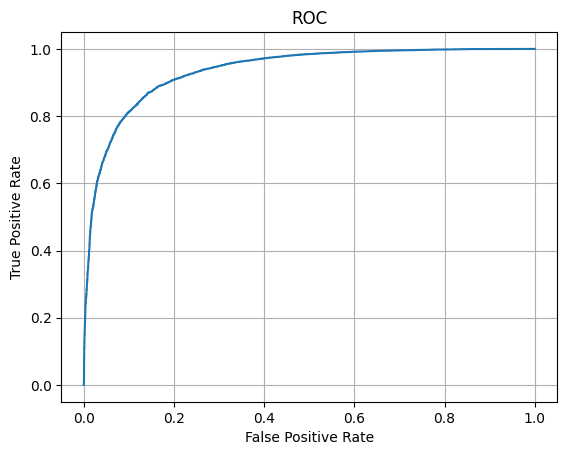

AUC ROC: 0.9356664896


In [21]:
#построение ROC-кривой и AUC ROC
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_score)
plt.plot(fpr, tpr)
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('AUC ROC:', auc(fpr, tpr))

### 11) Сделали выводы по результатам применения рекуррентной нейронной сети для решения задачи определения тональности текста.  

Таблица1:

| Модель   | Количество настраиваемых параметров | Количество эпох обучения | Качество классификации тестовой выборки |
|----------|-------------------------------------|---------------------------|-----------------------------------------|
| Рекуррентная | 184 897                              | 3                        | accuracy:0.8564     ; loss:0.3313     ; AUC ROC:0.9357                                   |


#### По результатам применения рекуррентной нейронной сети можно сделать вывод, что модель остаточно неплохо справилась с задачей определения тональности текста. Показатель accuracy = 0.8564 превышает требуемый порог 0.8. Значение AUC ROC = 0.9357 (> 0.9) говорит о высокой способности модели различать два класса на положительные и отрицательные области.